
# ICS - Travaux Pratiques 11

15.05.25


<font color=grey>_Ce 11e TP se concentre sur la méthode de Newton ainsi que sur les méthodes de point fixe._ 

_Note : ne vous sentez pas obligé.e.s de finir la série pendant la séance! Celle-ci est conçue de manière à ce que vous gardiez certains exercices pour vos révisions._ </font>

***

## Exercice 1 : Newton

Dans cet exercice, il vous est proposé de déterminer numériquement les zéros de la fonction 
$f(x)=(x+1)^2(x-\frac{3}{2})$. 

Pour ce faire, implémentez la **méthode de Newton** présentée en cours en définissant une fonction `resoudre_par_Newton`$\dots$
* $\dots$ dont les arguments sont la fonction `f` étudiée, le point de départ `x_0` de la méthode, la fonction dérivée `fprime`, la tolérance `eps` et le nombre maximum d'itérations autorisées `k_max` ;
* $\dots$ qui calcule par itérations une approximation d'un zéro de $f$ ;
* $\dots$ qui s'arrête :
    - soit quand la valeur absolue de $f(x_k)$ est inférieure à la tolérance ; 
    - soit quand le nombre maximum d'itérations est atteint ; 
    - si la valeur de la dérivée utilisée à chaque itération est inférieure à `1e-10` pour éviter tout problème de divergence dans la formule utilisée ;
* $\dots$ qui retourne une valeur approchée d'un zéro de $f$, ainsi qu'une liste de tuples, ces tuples contenant les couples $(x_k,f(x_k))$ utilisés à chaque itération $k$. 

Testez votre implémentation en recherchant les deux zéros de la fonction $f$ avec une tolérance de $10^{-8}$. Expérimentez l'efficacité de la méthode selon le point de départ $x_0$ choisi et selon la nature du zéro considéré. Constatez-vous des différences notables ? Si oui, essayez d'en expliquer la raison, notamment en vous basant sur le graphe de cette fonction.

Représentez graphiquement la différence
$$
x_{k} - x_{k-1}
$$
en fonction des itérations. Quelles conclusions peut-on tirer de la comparaison de cette différence à la dernière itération avec la tolérance (sur $f(x_k)$) que nous avons considérée ?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

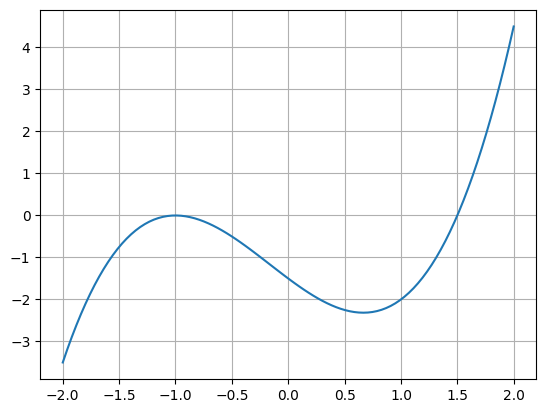

In [10]:
f = lambda x: (x + 1)**2 * (x - 3/2)
plt.plot(x:=np.linspace(-2, 2, 100), f(x))
plt.grid()
plt.show()

In [42]:
def newton(f, fprime, x_0, tol=-1, nmax=-1):
    root = x_0
    n = 0
    while True:
        n += 1
        if fprime(root) > 1e-10:
            newroot = root - f(root) / fprime(root)
        else:
            break
        if abs(newroot - root) < tol and tol != -1:
            break
        if n >= nmax and nmax != -1:
            break
        root = newroot
    return root, n

print(newton(f, lambda x: 3*x**2 + x - 2, 3, tol=1e-8))
print(newton(f, lambda x: 3*x**2 + x - 2, -1.2, tol=1e-8))

(1.5000000000000135, 7)
(-1.0000000128514688, 25)


In [43]:
def prop_parts(func, lbound, ubound, tol_target=-1, max_iter=-1):
    '''
    Uses the proportional parts method to find a root of a function in a given interval

    Args:
        func (function): function to calculate the zeros of
        lbound (float): lower bound of the interval
        ubound (float): lower bound of the interval
        tol_target (int, default: -1): in powers of ten, the wanted precision (ex. 1e-10), disable with -1 (disabled by default)
        max_iter (int, default: -1): maximum iterations to perform, disable with -1 (disabled by default)

    Returns:
        root (float): the root that was found

    Raises:
        Warning: if there is no sign change on the interval
        Exception: if the method does not converge
    '''
    # check if the interval qualifies
    if func(lbound)*func(ubound) > 0:
        raise Warning("The given interval does not satisfy the sign change condition")
        
    # middle of interval (only thing that needs to change from regular bissection algorithm)
    # m = slope = (func(l)-func(u))/(l-u)
    # b = y-intercept = (l*func(u) - u*func(l))/(l-u)
    # y = m*x + b = 0 <=> x = -b/m
    middle = lambda l, u: -((l*func(u) - u*func(l))/(l-u))/((func(l)-func(u))/(l-u))
    
    # main loop
    counter = 0
    while True:
        counter += 1
        
        # mid point
        mid = middle(lbound, ubound)
        # check if tolerance has been reached, return the root if yes
        if (mid - mid // 1 < tol_target and tol_target != -1) or (counter >= max_iter and max_iter != -1):
            return {"root": float(mid), "iterations": counter}

        # calculate function values
        values = np.array([lbound, mid, ubound])
        images = func(values)
        
        # by chance, maybe one of the three is a root?
        if 0 in images:
            return values[imges.find(0)]
            
        # check if [lbound, mid] qualifies
        if images[0]*images[1] < 0:
            ubound = mid # redefine upper bound to have [lbound, mid]
        
        # check if [mid, ubound] qualifies
        elif images[1]*images[2] < 0:
            lbound = mid # redefine lower bound to have [mid, ubound]

        # take care of the case where none of the two new intervals satisfy the sign change condition
        else:
            raise Exception("Sub-intervals do not converge, might be a floating point error")

***

## Exercice 2 : k-contraction

Les fonctions de $\mathcal{R}$ dans $\mathcal{R}$, $\displaystyle f(x)=\frac{\cos{(x)}+x}{4}$ et $\displaystyle g(x)=\frac{\cos{(x)}+x^2}{4}$ sont-elles **$K$-contractantes** sur tout intervalle $I$ contenu dans $\mathcal{R}$?

En cas de réponse négative, essayez de trouver un intervalle autour de l'origine dans lequel la fonction est $K$-contractante.

In [ ]:
# Représentation graphique des fonctions


***

## Exercice 3 : Points fixes

Dans cet exercice, il vous est demandé d'étudier les quatre fonctions suivantes :
$$
f(x) = 1-\sin{(x)}\,,~~~~
g(x) = \exp{(-4x)}\,,~~~~
h(x) = 0.4 \exp{(x)}-0.25\,~~~~\hbox{et}~~~~
i(x) = \displaystyle\frac{1}{1+\left(\frac{1-x}{x}\right)^2}\,,
$$
sur l'intervalle ouvert $I=\,]0,1[$.

Pour chacune de ces fonctions, vous devez en particulier $\dots$
- $\dots$ vérifier graphiquement l'existence d'un **unique point fixe** sur $I$ (en représentant la **fonction "identité"** $y(x)=x$) ;
- $\dots$ choisir deux valeurs différentes pour le point de départ $x_0$ et d'effectuer un certain nombre d'**itérations de la méthode de Picard** (en les représentant graphiquement sur la même figure) ;
- $\dots$ déterminer la nature du point fixe (**répulsif** ou **attracteur**) ;
- $\dots$ expliquer vos observations en vous intéressant au **comportement de la dérivée** et à sa valeur aux alentours du point fixe.

In [8]:
# Représentation graphique de l'existence d'un point fixe


In [ ]:
# Représentation graphique (ou sur papier) de la méthode de Picard
# appliquée aux fonctions présentées.


***

## Exercice 4 : Fonction d'itération

Soit $f(x)$ une fonction dont on cherche les zéros. Laquelle des fonctions $\Phi(x)$ suivantes est-elle, a priori, acceptable comme fonction d’itération ? Justifiez votre réponse.  <br/><br/>
&nbsp;   a) $\Phi(x) = f(x)/x$   <br/><br/>
&nbsp;   b) $\Phi(x) = (x + 1)f(x)$  <br/><br/>
&nbsp;   c) $\Phi(x) = 5f(x) + x^2 + x$   <br/><br/>
&nbsp;   d) $\Phi(x) = (x + 1) [f (x) + 1]$   <br/><br/>
&nbsp;   e) $\Phi(x) = (x + 1)f(x) + x$  

***

## Exercice 5 : Méthode de Picard

Reprenons les fonctions de l'exercice 2

$$
\displaystyle f(x)=\frac{\cos{(x)}+x}{4}~~~\hbox{et}~~~
\displaystyle g(x)=\frac{\cos{(x)}+x^2}{4}.
$$

Nous avons montré (n'est-ce pas) qu'elles sont $K$-contractantes sur $\mathcal{R}$ dans le cas de $f(x)$ et sur, par exemple, 
$I_\pi=\displaystyle\left]-\frac{\pi}{2},\frac{\pi}{2}\right[$ dans le cas de $g(x)$.

Dans cet exercice, il vous est demandé de :

a) vérifier que la fonction $f$ admet un unique point fixe et que la suite $\{x_k\}$ obtenue par la méthode de Picard converge vers ce point fixe quel que soit le point de départ $x_0$ de la méthode :
   * représentez graphiquement la fonction $f$ ;
   * vérifiez "visuellement" l'existence d'un unique point fixe ;
   * trouvez une valeur approchée à 5 décimales de ce point fixe grâce à la méthode de Picard, en testant votre implémentation avec différentes valeurs de départ $x_0$.

b) vérifier de manière analogue le théorème du point fixe du cours dans le cas particulier de la fonction $g$ sur $I_\pi$. Ce théorème s'applique-t-il dans le cas de cette fonction sur l'intervalle $\displaystyle\left]-\frac{\pi}{2},0\right[$ ?

In [ ]:
# a)


In [14]:
# b)
